## 한글

In [109]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# Dacon_영화 관객수 예측 경진대회
https://dacon.io/competitions/official/235536/data

In [ ]:
%ls

 sample_data/  '영화 관객수.zip'


In [ ]:
!unzip '영화 관객수.zip'

Archive:  영화 관객수.zip
  inflating: submission.csv          
  inflating: movies_train.csv        
  inflating: movies_test.csv         


# 라이브러리 로드

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
base_path = "."
train = pd.read_csv(f'{base_path}/movies_train.csv', index_col="title")
test = pd.read_csv(f'{base_path}/movies_test.csv', index_col="title")
submission = pd.read_csv(f'{base_path}/submission.csv', index_col="title")

train.shape, test.shape, submission.shape

((600, 11), (243, 10), (243, 1))

In [138]:
train.head(2)

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [139]:
test.head(2)

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
title,,,,,,,,,,
용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00,2,304,3
아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25,4,275,3


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

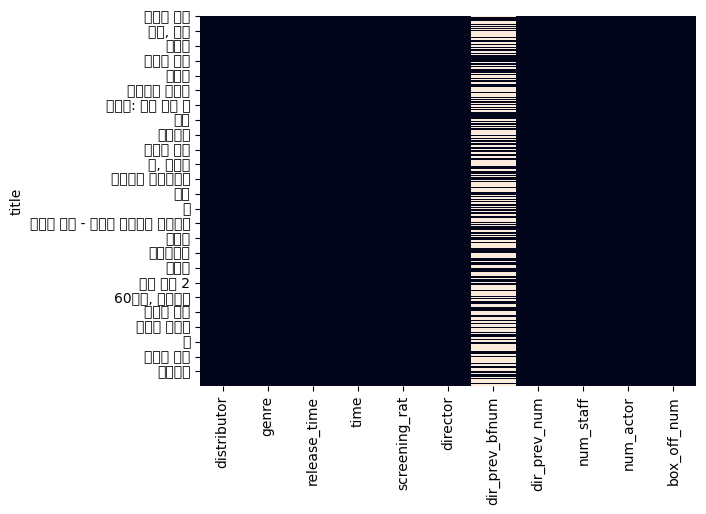

In [140]:
sns.heatmap(train.isnull(), cbar=False)
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [141]:
train = train.drop(['dir_prev_bfnum'],axis = 1)
test = test.drop(['dir_prev_bfnum'],axis = 1)

<Axes: title={'center': 'Pearson Correalation of Features'}>

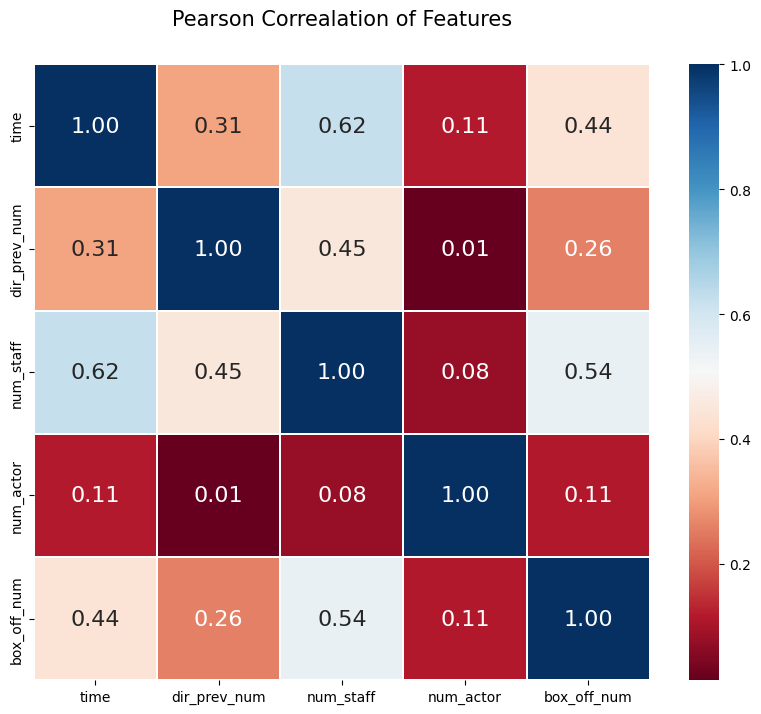

In [142]:
heatmap_data = train[['time','dir_prev_num','num_staff','num_actor','box_off_num']]

colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))

plt.title('Pearson Correalation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
            , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

<ipython-input-143-785b419f3c01>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, y='genre', x='box_off_num', ci=None)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

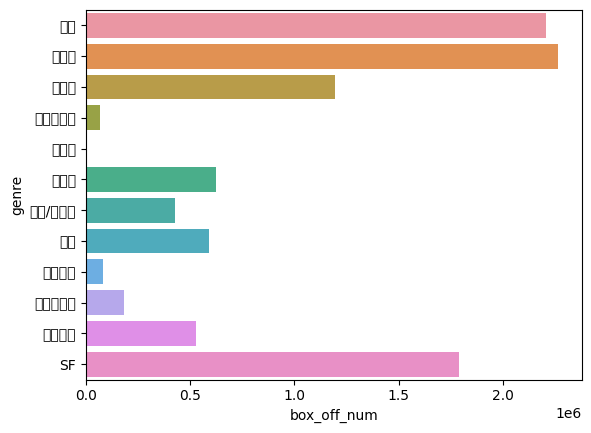

In [143]:
sns.barplot(data=train, y='genre', x='box_off_num', ci=None)
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [144]:
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

In [145]:
train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

<ipython-input-146-19456855214c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, y='distributor', x='box_off_num', ci=None)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

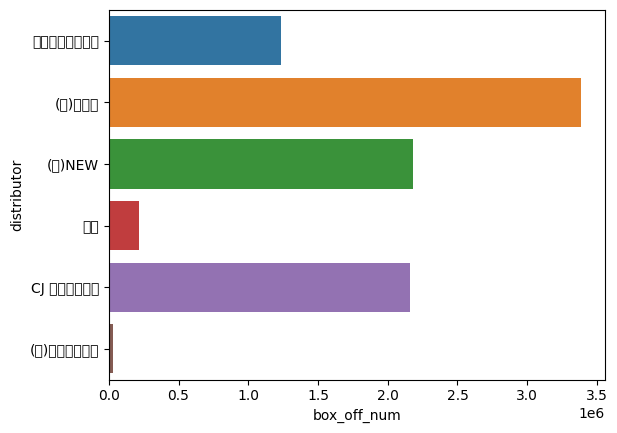

In [146]:
sns.barplot(data=train, y='distributor', x='box_off_num', ci=None)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

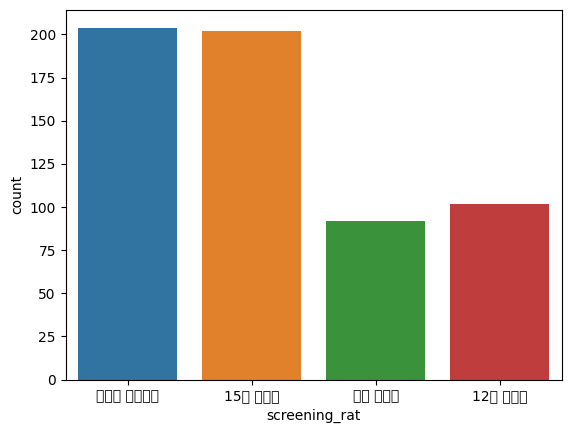

In [147]:
sns.countplot(x='screening_rat', data=train)
plt.show()

In [148]:
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [149]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   distributor    600 non-null    object        
 1   genre          600 non-null    object        
 2   release_time   600 non-null    datetime64[ns]
 3   time           600 non-null    int64         
 4   screening_rat  600 non-null    object        
 5   dir_prev_num   600 non-null    int64         
 6   num_staff      600 non-null    int64         
 7   num_actor      600 non-null    int64         
 8   box_off_num    600 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 63.0+ KB


In [151]:
train['년'] = pd.DatetimeIndex(train['release_time']).year
test['년'] = pd.DatetimeIndex(test['release_time']).year

train['월'] = pd.DatetimeIndex(train['release_time']).month
test['월'] = pd.DatetimeIndex(test['release_time']).month

train['일'] = pd.DatetimeIndex(train['release_time']).day
test['일'] = pd.DatetimeIndex(test['release_time']).day

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   distributor    600 non-null    object        
 1   genre          600 non-null    object        
 2   release_time   600 non-null    datetime64[ns]
 3   time           600 non-null    int64         
 4   screening_rat  600 non-null    object        
 5   dir_prev_num   600 non-null    int64         
 6   num_staff      600 non-null    int64         
 7   num_actor      600 non-null    int64         
 8   box_off_num    600 non-null    int64         
 9   년              600 non-null    int64         
 10  월              600 non-null    int64         
 11  일              600 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 77.1+ KB


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


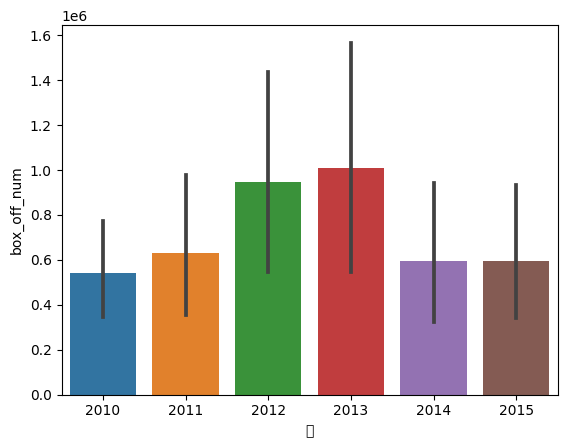

In [153]:
sns.barplot(data=train, x='년',  y='box_off_num')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


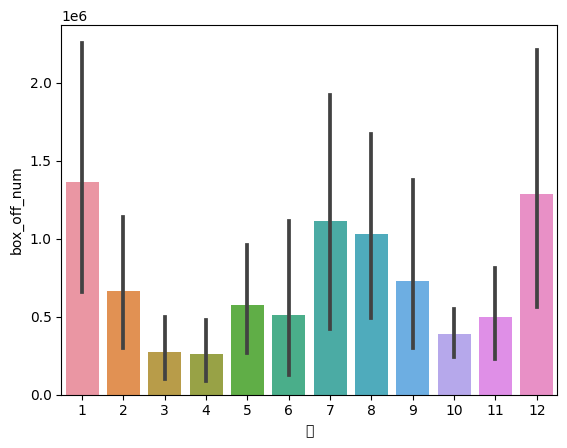

In [154]:
sns.barplot(data=train, x='월',  y='box_off_num')
plt.show()

In [155]:
categorical_feature = train.select_dtypes(exclude="number").columns
categorical_feature

Index(['distributor', 'genre', 'release_time', 'screening_rat'], dtype='object')

In [156]:
train[categorical_feature] = train[categorical_feature].astype("category")
test[categorical_feature] = test[categorical_feature].astype("category")

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distributor    600 non-null    category
 1   genre          600 non-null    category
 2   release_time   600 non-null    category
 3   time           600 non-null    int64   
 4   screening_rat  600 non-null    category
 5   dir_prev_num   600 non-null    int64   
 6   num_staff      600 non-null    int64   
 7   num_actor      600 non-null    int64   
 8   box_off_num    600 non-null    int64   
 9   년              600 non-null    int64   
 10  월              600 non-null    int64   
 11  일              600 non-null    int64   
dtypes: category(4), int64(8)
memory usage: 72.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 용서는 없다 to 조선안방 스캔들-칠거지악 2
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   

(None, None)

In [157]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distributor    600 non-null    category
 1   genre          600 non-null    category
 2   release_time   600 non-null    category
 3   time           600 non-null    int64   
 4   screening_rat  600 non-null    category
 5   dir_prev_num   600 non-null    int64   
 6   num_staff      600 non-null    int64   
 7   num_actor      600 non-null    int64   
 8   box_off_num    600 non-null    int64   
 9   년              600 non-null    int64   
 10  월              600 non-null    int64   
 11  일              600 non-null    int64   
dtypes: category(4), int64(8)
memory usage: 72.8+ KB


,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월,일
title,,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398,2012,11,22
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501,2015,11,19
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083,2013,6,5
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866,2012,7,12
불량남녀,기타,코미디,2010-11-04,108,15세 관람가,1,251,2,483387,2010,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091,2014,8,13
파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438,2013,3,14
살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475,2010,9,30


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distributor    600 non-null    category
 1   genre          600 non-null    category
 2   release_time   600 non-null    category
 3   time           600 non-null    int64   
 4   screening_rat  600 non-null    category
 5   dir_prev_num   600 non-null    int64   
 6   num_staff      600 non-null    int64   
 7   num_actor      600 non-null    int64   
 8   box_off_num    600 non-null    int64   
 9   년              600 non-null    int64   
 10  월              600 non-null    int64   
 11  일              600 non-null    int64   
dtypes: category(4), int64(8)
memory usage: 72.8+ KB


# 머신러닝


In [159]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train[categorical_feature] = oe.fit_transform(train[categorical_feature])
test[categorical_feature] = oe.transform(test[categorical_feature])

In [160]:
X = train.drop(columns="box_off_num")
y = train["box_off_num"]

X.shape, y.shape

((600, 11), (600,))

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.1, random_state=42
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((540, 11), (60, 11), (540,), (60,))

In [162]:
X_test = test
X_test.shape

(243, 11)

In [163]:

import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=250,
                             max_depth=3,
                             random_state=42,
                             n_jobs=-1)
model_xgb


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [164]:
from xgboost.callback import EarlyStopping
# fit
es = xgb.callback.EarlyStopping(
    rounds=2,
    save_best=True,
    maximize=False,
    data_name="validation_0",
    metric_name="rmse",
)

model_xgb.fit(X_train, y_train,
              eval_set=[(X_valid, y_valid)], callbacks=[es])

[0]	validation_0-rmse:1443936.12308
[1]	validation_0-rmse:1323592.00844
[2]	validation_0-rmse:1203334.59793
[3]	validation_0-rmse:1139501.22053
[4]	validation_0-rmse:1105026.71771
[5]	validation_0-rmse:1074804.30728
[6]	validation_0-rmse:1071047.38436
[7]	validation_0-rmse:1050378.01662
[8]	validation_0-rmse:1075482.67606
[9]	validation_0-rmse:1071529.54762


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [165]:
y_valid_predict = model_xgb.predict(X_valid)
y_valid_predict[:5]

array([1353034.1 ,   80202.59,   78045.76,   43831.22, 1145908.8 ],
      dtype=float32)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HAN

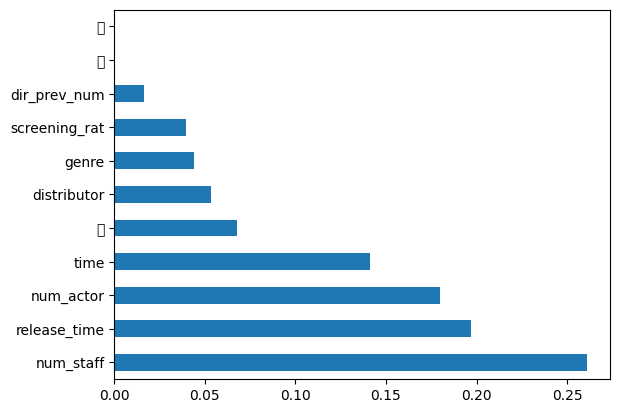

In [166]:
fi = pd.Series(model_xgb.feature_importances_)
fi.index = model_xgb.feature_names_in_
fi.nlargest(20).plot.barh()

In [167]:
fi.nlargest(20)

num_staff        0.260846
release_time     0.196711
num_actor        0.180025
time             0.141088
월                0.067916
distributor      0.053614
genre            0.043808
screening_rat    0.039690
dir_prev_num     0.016301
년                0.000000
일                0.000000
dtype: float32

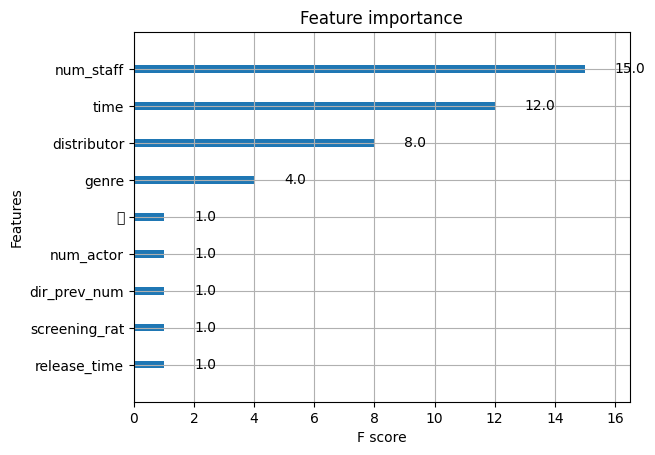

In [168]:
xgb.plot_importance(model_xgb, max_num_features=100);

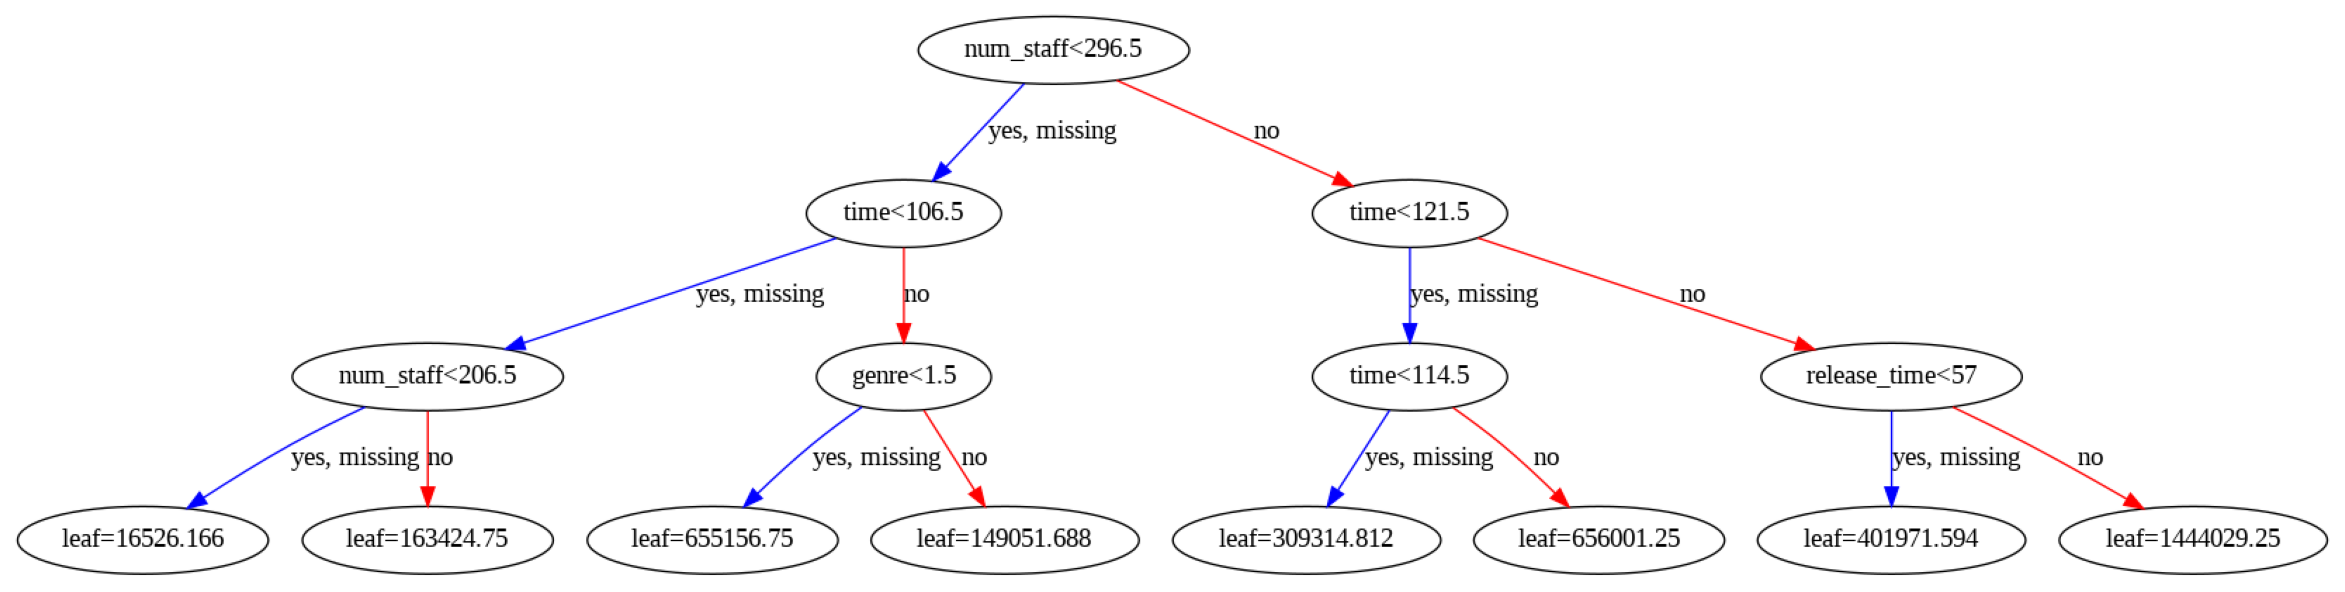

In [169]:
xgb.plot_tree(model_xgb, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(30, 20)

In [170]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_valid_predict)

0.5483803285391115

In [171]:
import lightgbm
model_lgbm = lightgbm.LGBMRegressor(boosting_type='goss',
                                    n_estimators=500, max_depth=2,
                                    early_stop_round=100,
                                    metrics=["mae", "mse"],
                                    n_jobs=-1,
                                    learning_rate=0.01, random_state=42)
model_lgbm

LGBMRegressor(boosting_type='goss', early_stop_round=100, learning_rate=0.01,
              max_depth=2, metrics=['mae', 'mse'], n_estimators=500,
              random_state=42)

In [172]:
y_train.value_counts(1)

419        0.003704
4586       0.003704
1547       0.003704
50308      0.003704
1250       0.003704
             ...   
61414      0.001852
205        0.001852
1422844    0.001852
1817069    0.001852
2344       0.001852
Name: box_off_num, Length: 527, dtype: float64

In [173]:
model_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: early_stop_round


LGBMRegressor(boosting_type='goss', early_stop_round=100, learning_rate=0.01,
              max_depth=2, metrics=['mae', 'mse'], n_estimators=500,
              random_state=42)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGU

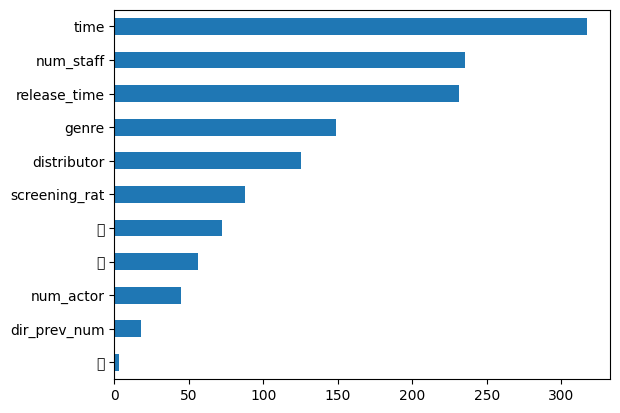

In [174]:
fi = pd.Series(model_lgbm.feature_importances_)
fi.index = model_lgbm.feature_name_
fi.nlargest(20).sort_values().plot.barh()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

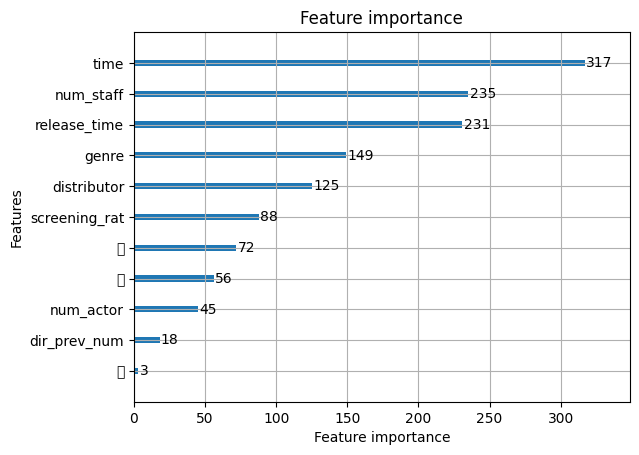

In [175]:
lightgbm.plot_importance(model_lgbm, max_num_features=20)

<Axes: >

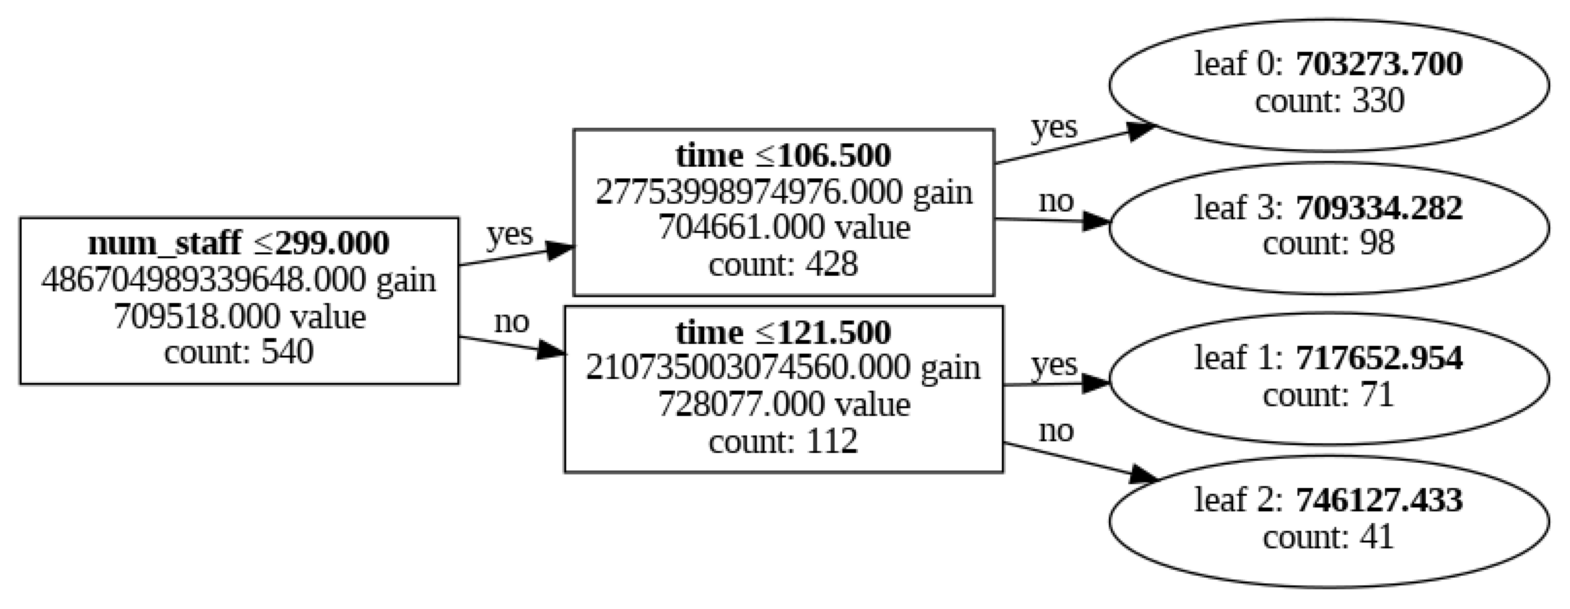

In [176]:
lightgbm.plot_tree(model_lgbm, figsize=(20, 20), tree_index=0,
                   show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count']
                   )


In [177]:
score_lgbm = model_lgbm.score(X_valid, y_valid)
score_lgbm

0.43001167131712337

# 딥러닝


In [179]:
import tensorflow as tf
model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

In [180]:
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mse", "mae"]
              )

In [181]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                768       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [182]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

history = model.fit(X_train, y_train,
                    epochs=50, validation_data=(X_valid, y_valid),
                    batch_size=10,
                    callbacks=[early_stop], verbose=1)
history

Epoch 1/50
54/54 [==============================] - 2s 9ms/step - loss: 3699687555072.0000 - mse: 3699687555072.0000 - mae: 763011.5000 - val_loss: 2403037085696.0000 - val_mse: 2403037085696.0000 - val_mae: 877205.5625
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 3327324848128.0000 - mse: 3327324848128.0000 - mae: 1022623.4375 - val_loss: 2360919457792.0000 - val_mse: 2360919457792.0000 - val_mae: 906938.2500
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 3279396536320.0000 - mse: 3279396536320.0000 - mae: 1001492.5000 - val_loss: 2326368092160.0000 - val_mse: 2326368092160.0000 - val_mae: 911428.2500
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 3172442308608.0000 - mse: 3172442308608.0000 - mae: 970865.6875 - val_loss: 2291670188032.0000 - val_mse: 2291670188032.0000 - val_mae: 923583.2500
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 3059573587968.0000 - mse: 3059573587968.0000 -

In [183]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
45,2.227799e+12,2.227799e+12,651585.5000,2.137341e+12,2.137341e+12,690303.3125
46,2.336127e+12,2.336127e+12,633454.3125,2.211811e+12,2.211811e+12,773576.2500
47,2.297186e+12,2.297186e+12,665058.8750,2.162933e+12,2.162933e+12,724896.1875
48,2.227019e+12,2.227019e+12,653052.3125,2.157305e+12,2.157305e+12,677506.4375
49,2.254740e+12,2.254740e+12,610994.9375,2.224845e+12,2.224845e+12,773072.1875


<Axes: >

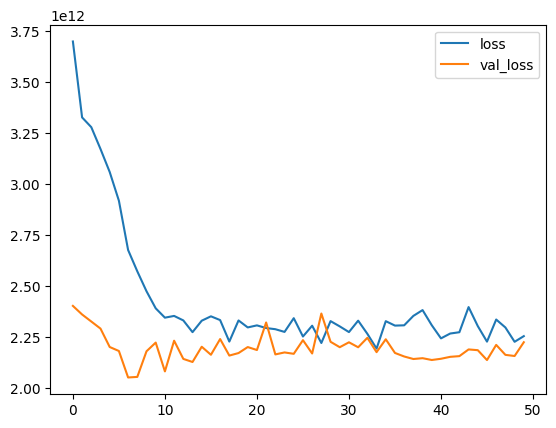

In [184]:
# loss, accuracy 값 시각화
df_hist[["loss", "val_loss"]].plot()

In [185]:
model.evaluate(X_valid, y_valid)

2/2 [==============================] - 0s 8ms/step - loss: 2224845488128.0000 - mse: 2224845488128.0000 - mae: 773072.2500


[2224845488128.0, 2224845488128.0, 773072.25]

In [186]:
y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

2/2 [==============================] - 0s 4ms/step


array([2308212.2 ,  208769.6 ,  143887.5 ,  231388.22,  908927.2 ],
      dtype=float32)

In [187]:
y_predict = model.predict(X_test).flatten()
y_predict[:5]

8/8 [==============================] - 0s 2ms/step


array([1504072.1, 1308933.6, 2605305. , 2494503.8, 2132261. ],
      dtype=float32)

In [188]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_valid_pred)
r2

0.08928724715079384

In [189]:
submission["box_off_num"] = y_predict

In [190]:
file_name = f"submit_tf_{r2:.5f}.csv"
file_name

'submit_tf_0.08929.csv'

In [ ]:
submission.to_csv(file_name)
pd.read_csv(file_name).head(2)

,title,box_off_num
0,용서는 없다,1215729.5
1,아빠가 여자를 좋아해,1034094.5


In [ ]:
from google.colab import files

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>